# *ALL STATE CUMMULATIVE JOB PREDICTION*

In [2]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('GKD_JOBS_ALL_ENGG.csv')

#print the head
df.head()

,CollegeState,Specialization,GraduationYear,Salary
0,Delhi,instrumentation and control engineering,2013,445000
1,Delhi,computer science & engineering,2013,420000
2,Delhi,computer science & engineering,2013,200000
3,Delhi,computer science & engineering,2013,375000
4,Delhi,computer science & engineering,2013,350000


<Axes: xlabel='GraduationYear', ylabel='Salary'>

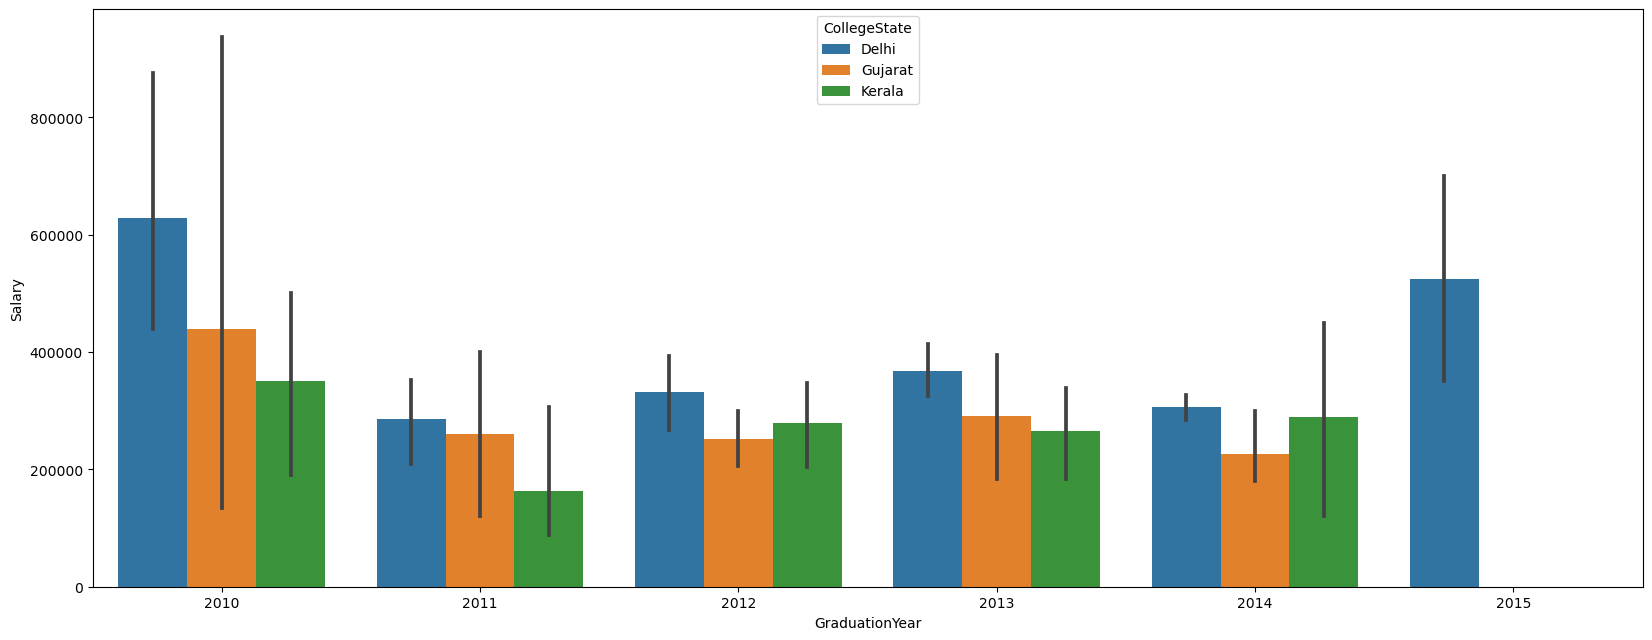

In [3]:
data=df
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='CollegeState', data=data)
# plt.title('Scientific and technical journal articles')
# plt.ylabel('Scientific and technical journal articles')
# plt.xlabel('Year')

<Axes: xlabel='GraduationYear', ylabel='Salary'>

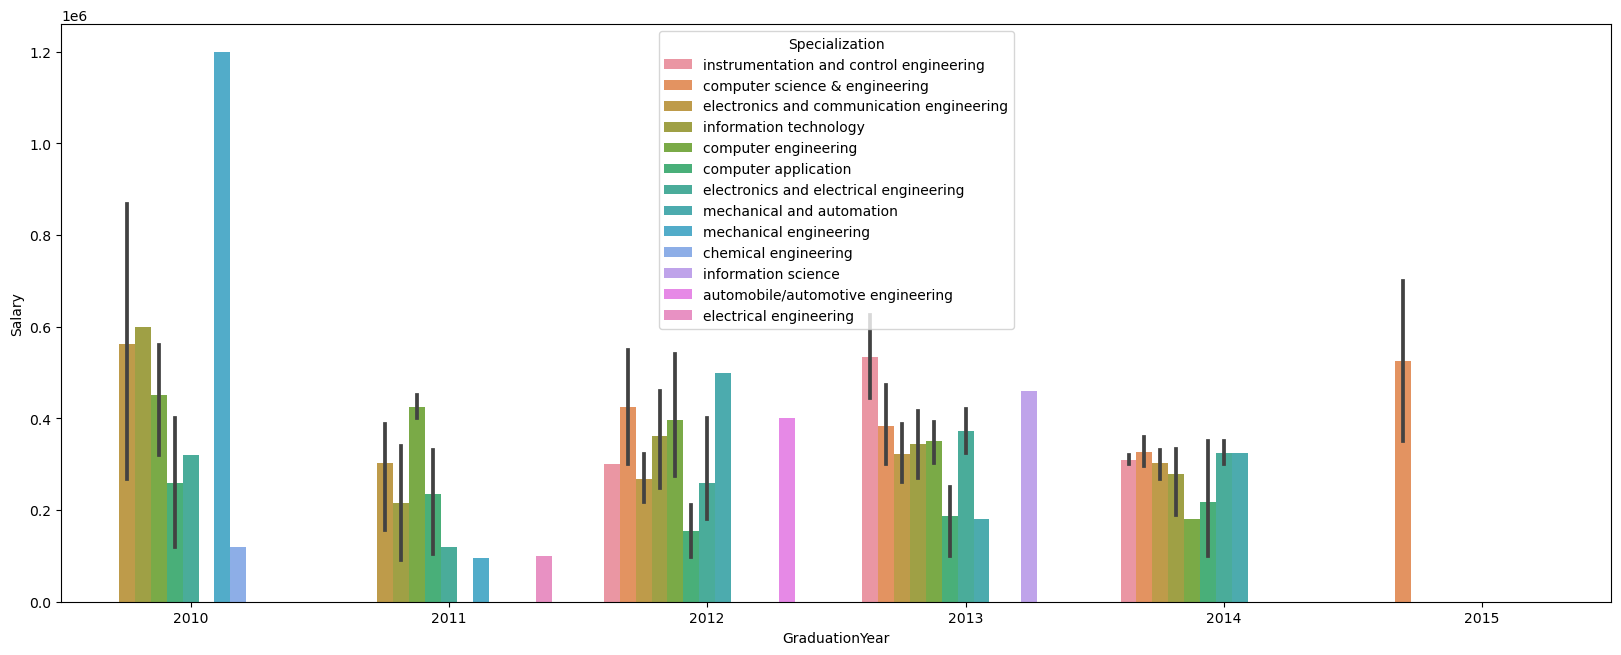

In [4]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='Specialization', data=data)

In [5]:
df.shape

(163, 4)

In [6]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['GraduationYear', 'Salary'])
for i in range(0,len(data)):
    new_data['GraduationYear'][i] = data['GraduationYear'][i]
    new_data['Salary'][i] = data['Salary'][i]

#setting index
new_data.index = new_data.GraduationYear
new_data.drop('GraduationYear', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# train = dataset[4:7,:]
# valid = dataset[7:8,:]

train = dataset[100:]
test = dataset[100:]
# split into input and outputs
x_train, y_train = train[:,:-1], train[:,:-1]
test_X, test_y = test[:,:-1], test[:,:-1]

# #converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(1,len(train)):
    x_train.append(scaled_data[i-1:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(62, 1, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
model_gru = Sequential()
model_gru.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])))
model_gru.add(LSTM(units=64, return_sequences=True))
model_gru.add(LSTM(units=16, return_sequences=True))
model_gru.add(LSTM(units=4, return_sequences=False))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mse', optimizer='adam')
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             5184      
                                                                 
 lstm_3 (LSTM)               (None, 4)                 336       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 121,493
Trainable params: 121,493
Non-trainable params: 0
_________________________________________________________________


In [8]:
gru_history = model_gru.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
2/2 [==============================] - 11s 22ms/step - loss: 0.1040
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1021
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1003
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0985
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0966
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0948
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0929
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0909
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0888
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0867
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0846
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0824
Epoch 13/100
2/2 [==============================

In [9]:
# predicting values, using past 10 from the train data
inputs = new_data[len(new_data) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

test_x = []
for i in range(1,inputs.shape[0]):
    test_x.append(inputs[i-1:i,0])
test_x = np.array(test_x)
test_x.shape
test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1], 1))
test_x.shape

(72, 1, 1)

In [10]:
predicted = model_gru.predict(test_x)
predicted = scaler.inverse_transform(predicted)

3/3 [==============================] - 2s 11ms/step


Text(0.5, 1.0, 'Cumulative salary of Engineering')

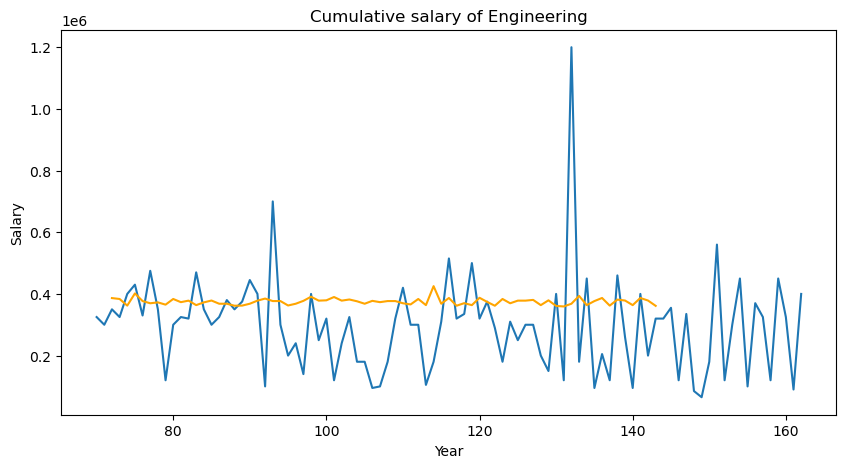

In [11]:
b=len(test_x)
c=len(predicted) + b
plt.figure(figsize=(10,5))
plt.plot(df.iloc[70:,3:4])
plt.plot(np.arange(b,c), np.array(predicted),label='Prediction', color='orange')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Cumulative salary of Engineering')

Text(0.5, 1.0, 'Prediction of Cumulative salary of Engineering')

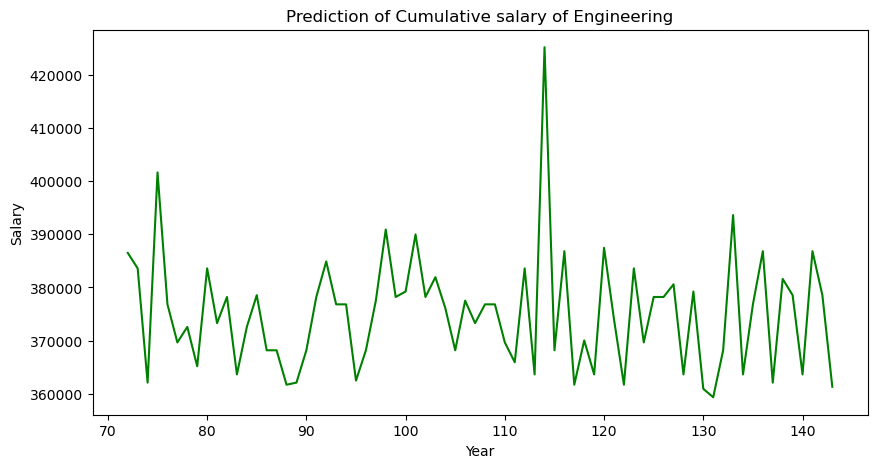

In [12]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(b,c), np.array(predicted), label='Prediction', color='green')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Prediction of Cumulative salary of Engineering')